In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()


In [13]:
def plot_learning(df, lr, sgd, var):
    df_temp = df[(df['lr']==lr) & (df['sgd_moment']==sgd)]
    
    if var == 'accuracy':
        plt.figure(figsize=(12,12))
        plt.title('Training curve for lr: {0:0.0e}, moment: {1:0.2f}'.format(lr,sgd))
        plt.plot(df_temp['batch_nb'], df_temp['accuracy_val'], c='r', label='Accuracy validation set')
        plt.plot(df_temp['batch_nb'], df_temp['accuracy_train'],c='b', label='Accuracy training set')
        max_training = np.max(df_temp['accuracy_train'])
        max_val = np.max(df_temp['accuracy_val'])

        plt.axhline(y=max_val, color='r', linestyle='--')
        plt.axhline(y=max_training, color='b', linestyle='--')
        plt.ylim([0,100])
        plt.legend()
        plt.ylabel('Accuracy')
        plt.xlabel('batch number')
        plt.yticks([10, 20, 30, 40, 50, 60, 70, 80,100,max_training,max_val])
        plt.savefig('fig.png')

    elif var == 'loss':
        plt.figure(figsize=(12,12))
        plt.plot(df_temp['batch_nb'], df_temp['loss_val'], c='r', label='Loss validation set')
        plt.plot(df_temp['batch_nb'], df_temp['loss_train'], c='b', label='Loss training set')
        min_training = np.min(df_temp['loss_train'])
        min_val = np.min(df_temp['loss_val'])
        plt.axhline(y=min_val, color='r', linestyle='--')
        plt.axhline(y=min_training, color='b', linestyle='--')
        plt.legend()
        plt.ylabel('Loss')
        plt.xlabel('batch number')
        plt.yticks([min_training,min_val])
        plt.ylim([0,0.30])
        plt.savefig('fig.png')



## 1) Chopping the linear layer


In [33]:
df = pd.read_csv('model_results.csv')

In [34]:
df['batch_nb'] = (df['epoch']-1)*70 +df['batch'] #compute batch number over the epochs

In [36]:
df

,nb_layer,sgd_moment,lr,epoch,batch,accuracy_val,loss_val,accuracy_train,loss_train,batch_nb
0,1,0.1,0.0,1,0,5.825243,0.238907,4.990758,0.171019,0
1,1,0.1,0.0,1,10,13.592233,0.520645,10.536044,0.374324,10
2,1,0.1,0.0,1,20,29.126214,0.355060,23.937153,0.405352,20
3,1,0.1,0.0,1,30,51.456311,0.139176,47.134935,0.139563,30
4,1,0.1,0.0,2,0,30.097087,0.162797,32.717190,0.146341,70
5,1,0.1,0.0,2,10,53.398058,0.072312,47.597043,0.096680,80
6,1,0.1,0.0,2,20,23.300971,0.143251,29.759704,0.135480,90
7,1,0.1,0.0,2,30,42.718447,0.118367,45.009242,0.114047,100
8,1,0.1,0.0,3,0,63.106796,0.068415,53.419593,0.079562,140
9,1,0.1,0.0,3,10,71.844660,0.033091,66.635860,0.044738,150


In [35]:
plot_learning(df, 0.1, 0, 'accuracy')

C:\Users\Leo\Anaconda3\envs\computervision\lib\site-packages\matplotlib\ticker.py:670: RuntimeWarning: invalid value encountered in less_equal
  locs = locs[(vmin <= locs) & (locs <= vmax)]


ValueError: cannot convert float NaN to integer

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001B351CF6C80> (for post_execute):


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

<Figure size 864x864 with 1 Axes>

## 2) Chopping the linear and the last convolutional layer

In [4]:
df = pd.read_csv('model_results_2_layers.csv')

In [5]:
df['batch_nb'] = (df['epoch']-1)*70 +df['batch'] #compute batch number over the epochs

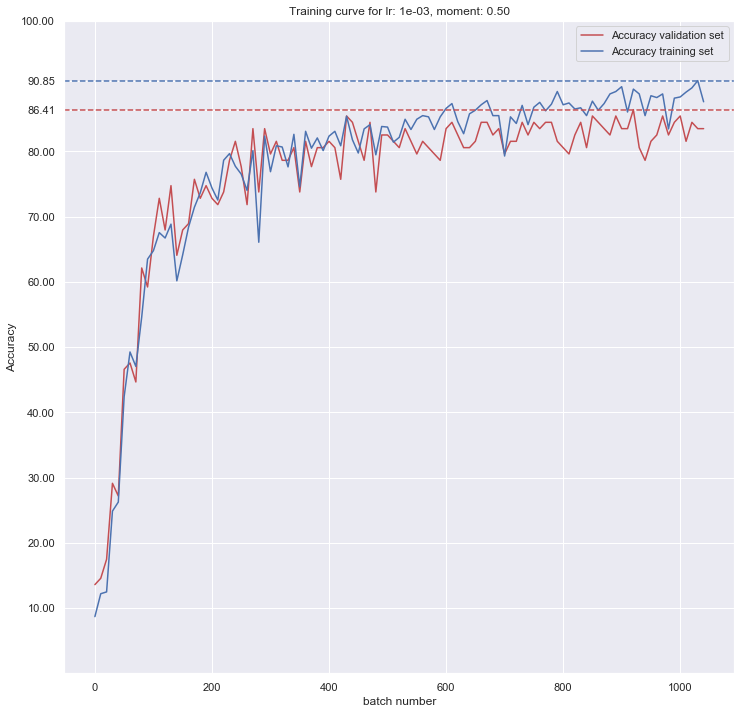

In [11]:
plot_learning(df, 0.001, 0.5, 'accuracy')

In [ ]:
plot_learning(df, 0.0001, 0.9, 'loss')